# PART 1

# 1. Import the data. Analyse the dimensions of the data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
pip install tflearn

     |████████████████████████████████| 112kB 9.2MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=dc618e9e51072075310bdfec47ef566dab47f747e500a62df22c80f6a94fc6eb
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [3]:
#Importing all the necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
import tflearn.datasets.oxflower17 as oxflower17 # Importing dataset

from PIL import Image , ImageFilter # Image handling Library
import cv2 # Image handling Library

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
tf.__version__ #Checking tensorflow version

'2.4.1'

In [5]:
X,y = oxflower17.load_data(one_hot= False) #Loading dataset

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [6]:
!ls -l

total 12
drwxr-xr-x 3 root root 4096 Mar 14 19:06 17flowers
drwx------ 5 root root 4096 Mar 14 19:06 drive
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data


In [7]:
project_path = "/content/17flowers/jpg"
img_size = 224
img_depth = 3
X_new =[]
y_new = []

In [8]:
os.chdir(project_path)

In [9]:
os.listdir()

['7',
 'files.txt~',
 '1',
 '15',
 '2',
 '11',
 '0',
 '14',
 'files.txt',
 '6',
 '13',
 '8',
 '5',
 '4',
 '3',
 '16',
 '10',
 '9',
 '12']

In [10]:
#Making list for easy traverse
l = os.listdir()
l.remove("files.txt")
l.remove("files.txt~")
print(l)

['7', '1', '15', '2', '11', '0', '14', '6', '13', '8', '5', '4', '3', '16', '10', '9', '12']


In [11]:
#Loading data from CWD 
for i in l:
  #print(i)
  for j in os.listdir(i):
    #print(project_path + '/' + i + '/' + j)
    temp = cv2.imread(project_path + '/' + i + '/' + j)
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    temp_resize = cv2.resize(temp, (img_size, img_size))
    X_new.append(temp_resize)
    y_new.append(i)

In [12]:
X_new = np.array(X_new)
print("Dimesions of data : ", X_new.shape)

Dimesions of data :  (1360, 224, 224, 3)


In [13]:
y_new = np.array(y_new)
print("Dimesions of labels : ", y_new.shape)

Dimesions of labels :  (1360,)


In [14]:
print("Image size : ", X_new[0].shape)

Image size :  (224, 224, 3)


In [15]:
y_new[:5]

array(['7', '7', '7', '7', '7'], dtype='<U2')

# 2. Preprocess the data.

In [16]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, shuffle = True, random_state = 42, stratify = y_new)

In [17]:
print("Dimesions of training data : ", X_train.shape)

Dimesions of training data :  (1088, 224, 224, 3)


In [18]:
print("Dimesions of testing data : ", X_test.shape)

Dimesions of testing data :  (272, 224, 224, 3)


In [19]:
# Randomly shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

In [20]:
# Declaring no. of classes variable
num_classes = 17 # 0 - 16
print("No. of Classes : ", num_classes)

No. of Classes :  17


In [21]:
#One hot encoding the train labels
y_train = tf.keras.utils.to_categorical(y_train,num_classes) 
#One hot encoding the test labels
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [22]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [23]:
#Normalize both the train and test image data from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [24]:
X_train /= 255
X_test /= 255

In [25]:
#Reshaping the image data
X_train = X_train.reshape(X_train.shape[0],img_size,img_size,img_depth) 
X_test = X_test.reshape(X_test.shape[0],img_size,img_size,img_depth)

# 3. Data visualisation:

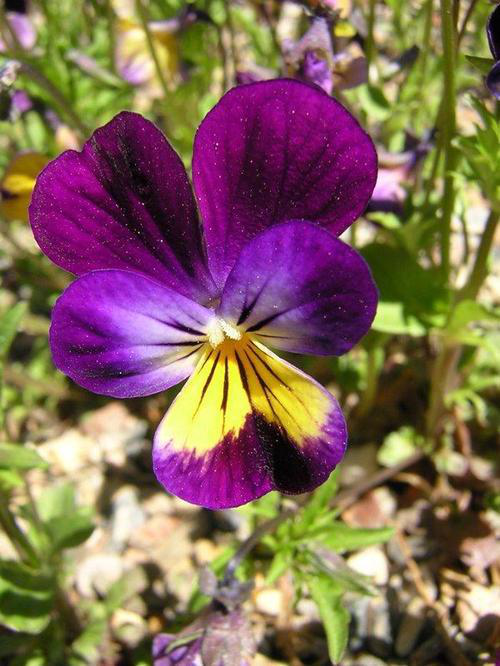

In [26]:
# Opening image for viewing
Image.open('/content/17flowers/jpg/16/image_1291.jpg')

### Display the images.

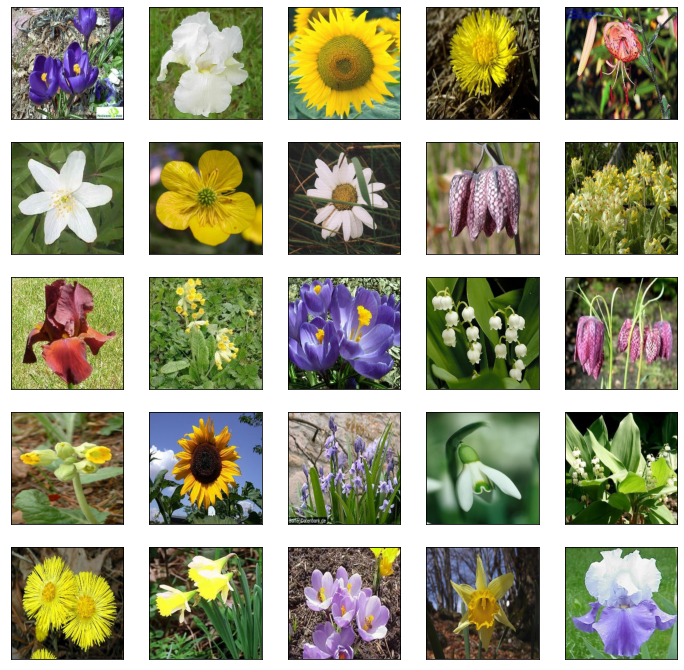

In [27]:
from random import randint
plt.figure(figsize=(12,12)) # plot 25 images
for i in range(25):
    value = randint(0,1360)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_new[value],cmap=plt.cm.binary)

### Display the labels.

In [28]:
np.unique(y_new)

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '2', '3', '4',
       '5', '6', '7', '8', '9'], dtype='<U2')

In [29]:
l_new = []
for i in range(0, len(l)): 
  l_new.append(int(l[i]))

l_new.sort()
print(l_new)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [30]:
classes = ['Daffodil','Snowdrop','LilyValley','Bluebell','Crocus','Iris','Tigerlily','Tulip','Fritillary','Sunflower','Daisy','ColtisFoot','Dandelion','Cowslip','Buttercup','Windflower','Pansy']

In [31]:
# using dictionary comprehension 
# to convert lists to dictionary 
Labels = {l_new[i]: classes[i] for i in range(len(l_new))} 
  
# Printing resultant dictionary  
print ("Labels is : " +  str(Labels))

Labels is : {0: 'Daffodil', 1: 'Snowdrop', 2: 'LilyValley', 3: 'Bluebell', 4: 'Crocus', 5: 'Iris', 6: 'Tigerlily', 7: 'Tulip', 8: 'Fritillary', 9: 'Sunflower', 10: 'Daisy', 11: 'ColtisFoot', 12: 'Dandelion', 13: 'Cowslip', 14: 'Buttercup', 15: 'Windflower', 16: 'Pansy'}


### Display images vs labels.

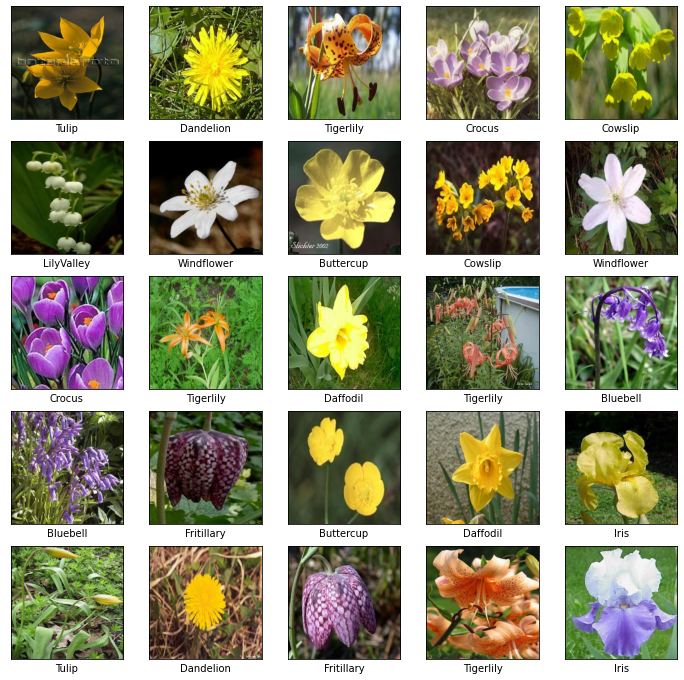

In [32]:
plt.figure(figsize=(12,12)) # plot 25 images
for i in range(25):
    value = randint(0,1360)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_new[value],cmap=plt.cm.binary)
    plt.xlabel(Labels[int(y_new[value])])

### Apply different filters [ for example: blur, contour, edge detection, emboss, smooth etc.] on the images and display the image.

Text(0.5, 0, 'Blured')

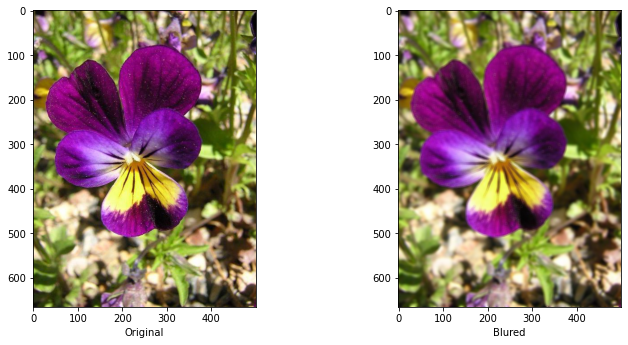

In [33]:
img = Image.open('/content/17flowers/jpg/16/image_1291.jpg')
filtered_img = img.filter(ImageFilter.BLUR)
plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(np.asarray(filtered_img))
plt.xlabel('Blured')

Text(0.5, 0, 'Contoured')

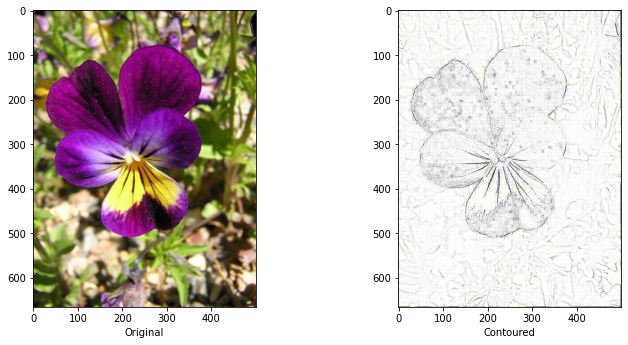

In [34]:
img = Image.open('/content/17flowers/jpg/16/image_1291.jpg')
filtered_img = img.filter(ImageFilter.CONTOUR)
plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(np.asarray(filtered_img))
plt.xlabel('Contoured')

Text(0.5, 0, 'Edge Detection')

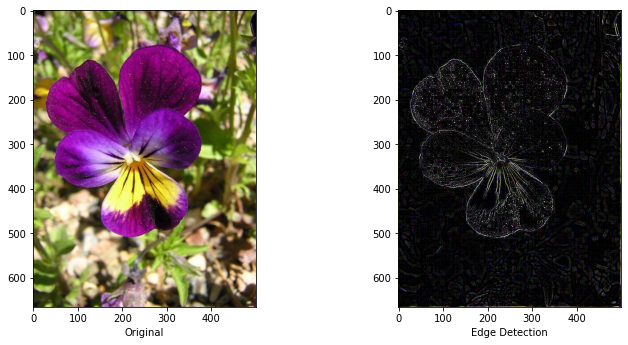

In [35]:
img = Image.open('/content/17flowers/jpg/16/image_1291.jpg')
filtered_img = img.filter(ImageFilter.FIND_EDGES)
plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(np.asarray(filtered_img))
plt.xlabel('Edge Detection')

Text(0.5, 0, 'Embossed')

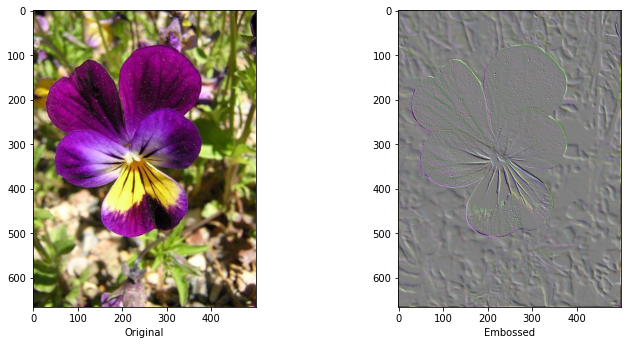

In [36]:
img = Image.open('/content/17flowers/jpg/16/image_1291.jpg')
filtered_img = img.filter(ImageFilter.EMBOSS)
plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(np.asarray(filtered_img))
plt.xlabel('Embossed')

Text(0.5, 0, 'Smoothened')

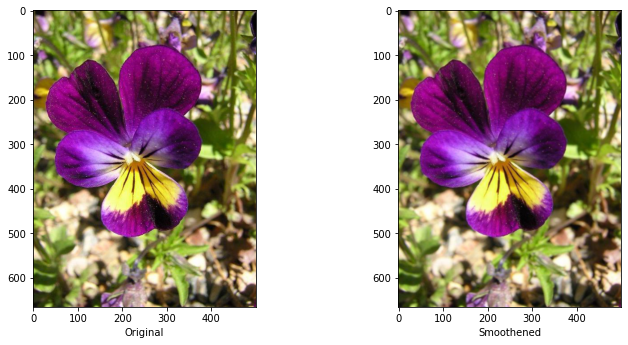

In [37]:
img = Image.open('/content/17flowers/jpg/16/image_1291.jpg')
filtered_img = img.filter(ImageFilter.SMOOTH)
plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(np.asarray(filtered_img))
plt.xlabel('Smoothened')

Text(0.5, 0, 'Sharpened')

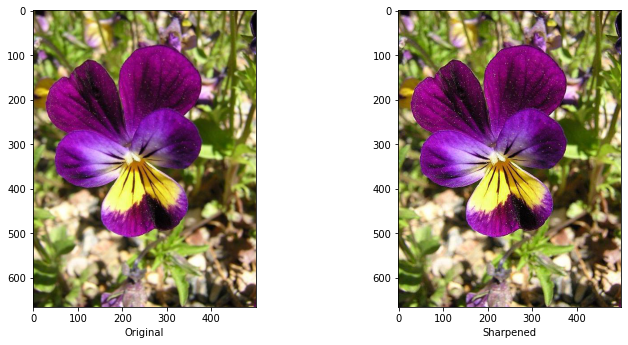

In [38]:
img = Image.open('/content/17flowers/jpg/16/image_1291.jpg')
filtered_img = img.filter(ImageFilter.SHARPEN)
plt.figure(figsize=(12,12))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplot(2,2,1)
plt.imshow(np.asarray(img))
plt.xlabel('Original')
plt.subplot(2,2,2)
plt.imshow(np.asarray(filtered_img))
plt.xlabel('Sharpened')

# 4. Train tune and test AIML image classifier model using:

In [39]:
#Creating DataFrame for storing the accuracies of all different models
col_names = ['Model', 'Accuracy']
resultsdf = pd.DataFrame(columns = col_names)
print(resultsdf)

Empty DataFrame
Columns: [Model, Accuracy]
Index: []


### Use supervised learning algorithms for training.

In [40]:
print("Actual training data shape : ", X_train.shape)

Actual training data shape :  (1088, 224, 224, 3)


In [41]:
print("Actual training label shape : ", y_train.shape)

Actual training label shape :  (1088, 17)


In [42]:
#Flattening the traning data
nsamples, nx, ny, nz = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny*nz))

In [43]:
#Flattening the testing data
nsamples, nx, ny, nz = X_test.shape
d2_X_test = X_test.reshape((nsamples,nx*ny*nz))

In [44]:
print("After flattening training data shape : " ,d2_X_train.shape)

After flattening training data shape :  (1088, 150528)


In [45]:
print("After flattening testing data shape : " ,d2_X_test.shape)

After flattening testing data shape :  (272, 150528)


In [46]:
# Declaring MultinomialNB Classifier
clf = MultinomialNB()

In [47]:
# Training model
clf.fit(d2_X_train,(np.argmax(y_train ,axis=-1)))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
# Predicting for all of test dataset
pred = clf.predict(d2_X_test)

print("Accuracy Score of training set: {}".format(accuracy_score(np.argmax(y_train, axis=1),clf.predict(d2_X_train)))) 
print("Accuracy Score of testing set: {}".format(accuracy_score(np.argmax(y_test, axis=1),pred)))

Accuracy Score of training set: 0.5073529411764706
Accuracy Score of testing set: 0.33455882352941174


Predicition is => 9 : Sunflower


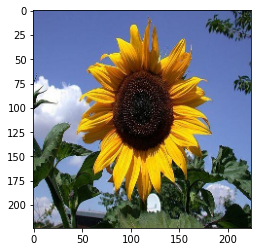

In [49]:
#Predicting for one image and displaying the same 
print("Predicition is => {0} : {1}" .format( pred[0], classes[pred[0]]))


flower = X_test[0].reshape(img_size,img_size,3)
plt.imshow(flower, cmap= 'gray')
plt.show()

Text(0.5, 1.0, 'Accuracy Score for MultinomialNB: 0.33455882352941174')

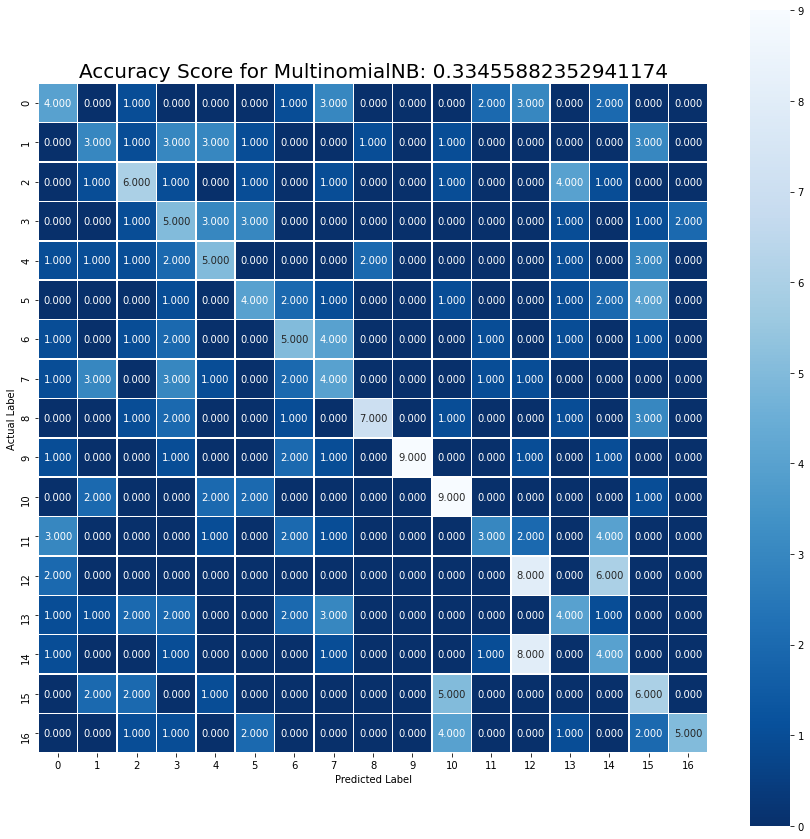

In [50]:
cm = confusion_matrix(np.argmax(y_test, axis=1), pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for MultinomialNB: {0}'.format(accuracy_score(np.argmax(y_test, axis=1), pred))
plt.title(all_sample_title, size = 20)

In [51]:
# Classification Report
cr = classification_report(np.argmax(y_test, axis=1),pred)
print(cr)

              precision    recall  f1-score   support

           0       0.27      0.25      0.26        16
           1       0.23      0.19      0.21        16
           2       0.35      0.38      0.36        16
           3       0.21      0.31      0.25        16
           4       0.31      0.31      0.31        16
           5       0.31      0.25      0.28        16
           6       0.29      0.31      0.30        16
           7       0.21      0.25      0.23        16
           8       0.70      0.44      0.54        16
           9       1.00      0.56      0.72        16
          10       0.41      0.56      0.47        16
          11       0.38      0.19      0.25        16
          12       0.35      0.50      0.41        16
          13       0.29      0.25      0.27        16
          14       0.19      0.25      0.22        16
          15       0.25      0.38      0.30        16
          16       0.71      0.31      0.43        16

    accuracy              

In [52]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['MultinomialNB'],'Accuracy': (accuracy_score(np.argmax(y_test, axis=1), pred))},index={'1'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

Model  Accuracy
1  MultinomialNB  0.334559

### Using ImageDataGenerator to avoid the overfitting problem from start for ANN and CNN.

In [53]:
#ImageDataGenerator declaration 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=50,  
                                                          width_shift_range=0.1,  
                                                          height_shift_range=0.1,  
                                                          horizontal_flip=True, 
                                                          shear_range=0.2,
                                                          zoom_range=0.2,  
                                                          fill_mode="nearest")  

# Prepare the generator
datagen.fit(X_train)

### Use neural networks for training.

In [54]:
ann_batch_size = 32
ann_epochs = 25

In [55]:
# Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
ann = tf.keras.models.Sequential()

# Input layer 
ann.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(img_size,img_size,img_depth)))

# Normalize the data
ann.add(tf.keras.layers.BatchNormalization())

# Dense Layer
ann.add(tf.keras.layers.Dense(128,activation='relu'))

# Normalize the data
ann.add(tf.keras.layers.BatchNormalization())

# Flatten layer
ann.add(tf.keras.layers.Flatten())

# Dense Layer
ann.add(tf.keras.layers.Dense(32,activation='relu'))

# Normalize the data
ann.add(tf.keras.layers.BatchNormalization())

#Output layer
ann.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

#Configuring the model for training
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Model summary 
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224, 224, 64)      256       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
dense_1 (Dense)              (None, 224, 224, 128)     8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 128)     512       
_________________________________________________________________
flatten (Flatten)            (None, 6422528)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                205520928 
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                1

In [57]:
# Training the model
ann.fit(datagen.flow(X_train,y_train,batch_size=ann_batch_size),
                  steps_per_epoch=X_train.shape[0]/32,
                  epochs=ann_epochs,
                  validation_data=(X_test,y_test))

Epoch 1/25
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 3.0557 - acc: 0.1618

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34/34 [==============================] - 45s 342ms/step - batch: 16.5000 - size: 32.0000 - loss: 3.0557 - acc: 0.1618 - val_loss: 2.8320 - val_acc: 0.0588
Epoch 2/25
34/34 [==============================] - 14s 419ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.6013 - acc: 0.1903 - val_loss: 2.8771 - val_acc: 0.0588
Epoch 3/25
34/34 [==============================] - 14s 421ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.2999 - acc: 0.2518 - val_loss: 2.9022 - val_acc: 0.0588
Epoch 4/25
34/34 [==============================] - 14s 419ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.0439 - acc: 0.3419 - val_loss: 2.9249 - val_acc: 0.0588
Epoch 5/25
34/34 [==============================] - 14s 418ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.8497 - acc: 0.4237 - val_loss: 2.9709 - val_acc: 0.0662
Epoch 6/25
34/34 [==============================] - 14s 420ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.7092 - acc: 0.4577 - val_loss: 2.9397 - val_acc: 0.1029
Epoch 7/25
34/3

In [58]:
# Final evaluation of the model
loss, acc = ann.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print()

loss, acc = ann.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 80.882%
Train Loss: 0.676

Test Accuracy: 65.809%
Test Loss: 1.119


In [59]:
# Predicting for all of test dataset 
y_pred_ann = np.argmax(ann.predict(X_test),axis=-1)
# Label categorical Conversion
y_test_f = np.argmax(y_test,axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Text(0.5, 1.0, 'Accuracy Score for ANN: 0.6580882352941176')

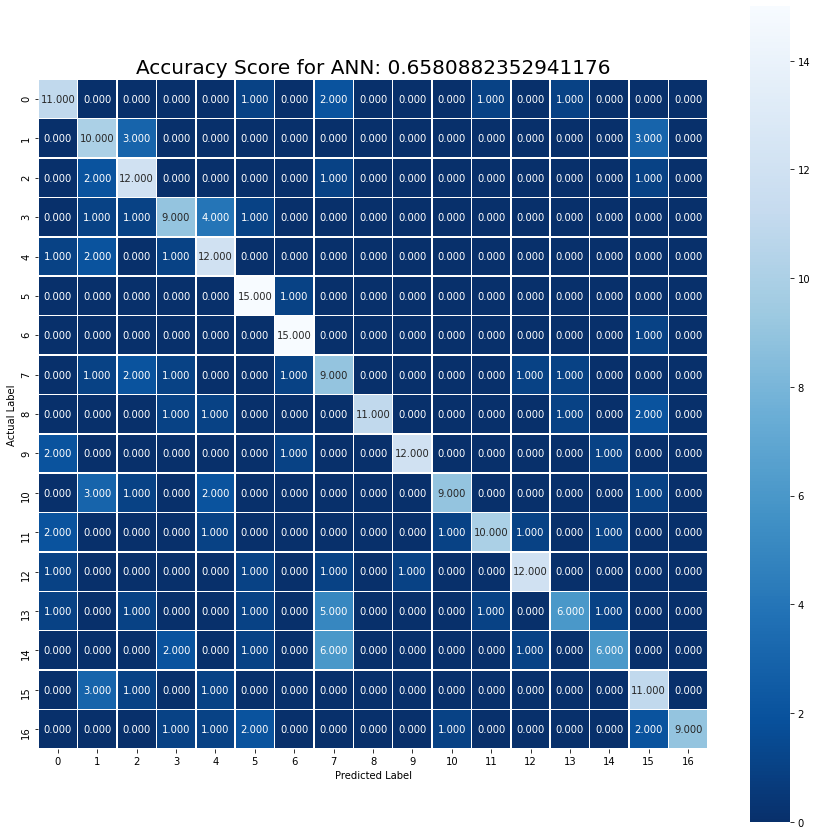

In [60]:
# Confusion Matrix

cm = confusion_matrix(y_test_f,y_pred_ann)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for ANN: {0}'.format(accuracy_score(y_test_f,y_pred_ann))
plt.title(all_sample_title, size = 20)

In [61]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['ANN'],'Accuracy': ann.evaluate(X_test, y_test, verbose=0)[1]},index={'2'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

Model  Accuracy
1  MultinomialNB  0.334559
2            ANN  0.658088

### Use CNN for training.

In [62]:
cnn_batch_size = 32
cnn_epochs = 25

In [63]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model
cnn = tf.keras.models.Sequential()

#Adding first convolutional layer
cnn.add(tf.keras.layers.Conv2D(32, #Number of filters 
                               kernel_size=(3,3), #Size of the filter
                               activation='relu',
                               input_shape=(img_size,img_size,img_depth)))

#Add MaxPooling layer 1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Adding second convolutional layer
cnn.add(tf.keras.layers.Conv2D(32, #Number of filters 
                               kernel_size=(3,3), #Size of the filter
                               activation='relu', padding='same'))

#Add MaxPooling layer 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
cnn.add(tf.keras.layers.Flatten())

#Dense layer 1
cnn.add(tf.keras.layers.Dense(256, activation='relu'))

#Add another dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

#Dense layer 2
cnn.add(tf.keras.layers.Dense(512, activation='relu'))

#Add another dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

#Dense layer 3
cnn.add(tf.keras.layers.Dense(1024, activation='relu')) #, kernel_regularizer = tf.keras.regularizers.l2( l=0.01)

#Add anoter dropout layer
cnn.add(tf.keras.layers.Dropout(0.25))

#Output layer
cnn.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile model
#adam_opt = tf.keras.optimizers.Adam(lr=0.00001)
cnn.compile(optimizer=tf.keras.optimizers.RMSprop(lr=2e-4), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5,verbose=1, mode='auto')
callback_list = [early_stopping]

In [64]:
# Model summary 
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 111, 111, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 55, 55, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 96800)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2

In [65]:
#Train the model
cnn.fit(datagen.flow(X_train,y_train,batch_size=cnn_batch_size),
                    steps_per_epoch=X_train.shape[0]/32,
                    epochs=cnn_epochs,
                    validation_data=(X_test,y_test),
                    callbacks = callback_list)

Epoch 1/25
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 2.8908 - acc: 0.0910

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34/34 [==============================] - 12s 275ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.8908 - acc: 0.0910 - val_loss: 2.5856 - val_acc: 0.1618
Epoch 2/25
34/34 [==============================] - 10s 314ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.5107 - acc: 0.1498 - val_loss: 2.3149 - val_acc: 0.2316
Epoch 3/25
34/34 [==============================] - 11s 312ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.3490 - acc: 0.1627 - val_loss: 2.0955 - val_acc: 0.2794
Epoch 4/25
34/34 [==============================] - 11s 312ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.1686 - acc: 0.2215 - val_loss: 2.0205 - val_acc: 0.2794
Epoch 5/25
34/34 [==============================] - 11s 314ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.0873 - acc: 0.2500 - val_loss: 1.8279 - val_acc: 0.3529
Epoch 6/25
34/34 [==============================] - 11s 314ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.9653 - acc: 0.2914 - val_loss: 1.8651 - val_acc: 0.3088
Epoch 7/25
34/3

In [66]:
# Final evaluation of the model
loss, acc = cnn.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print()

loss, acc = cnn.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 73.346%
Train Loss: 0.806

Test Accuracy: 68.382%
Test Loss: 1.048


In [67]:
# Predicting for all of test dataset 
y_pred_cnn = np.argmax(cnn.predict(X_test),axis=-1)
# Label categorical Conversion
y_test_f = np.argmax(y_test,axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Text(0.5, 1.0, 'Accuracy Score for CNN: 0.6838235294117647')

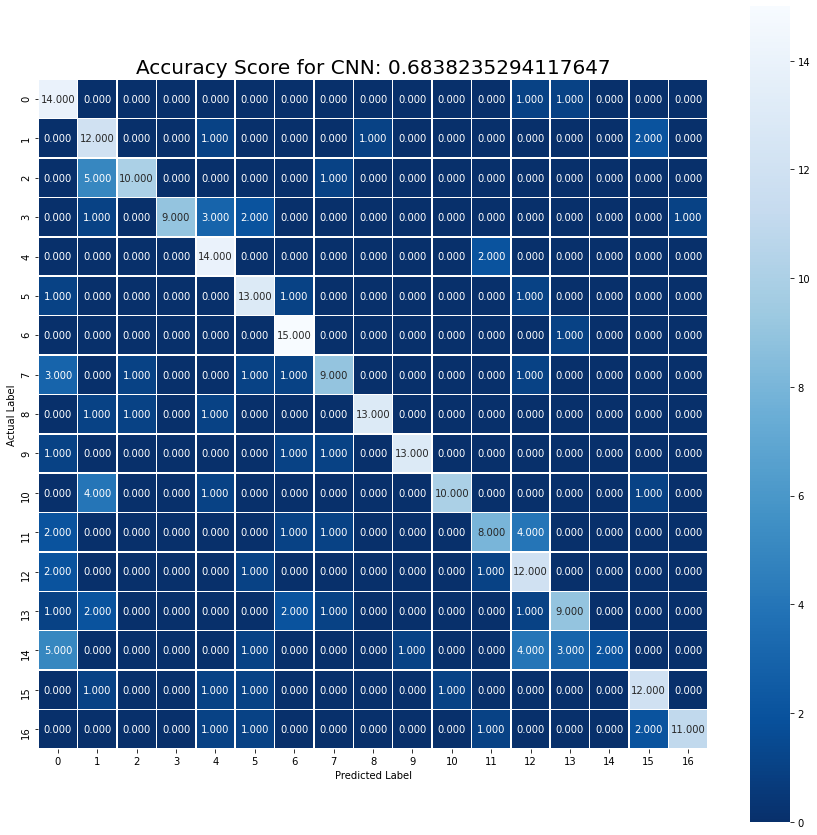

In [68]:
# Confusion Matrix

cm = confusion_matrix(y_test_f,y_pred_cnn)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for CNN: {0}'.format(accuracy_score(y_test_f,y_pred_cnn))
plt.title(all_sample_title, size = 20)

In [69]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['CNN'],'Accuracy': cnn.evaluate(X_test, y_test, verbose=0)[1]},index={'3'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

Model  Accuracy
1  MultinomialNB  0.334559
2            ANN  0.658088
3            CNN  0.683824

### Use various CNN with transferred learning models for training.

In [70]:
# Preprocessing data again for transfer learning

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, shuffle = True, random_state = 42, stratify = y_new)

# Randomly shuffle the training data
X_train_new, y_train_new = shuffle(X_train_new, y_train_new)

#One hot encoding the train labels
y_train_new = tf.keras.utils.to_categorical(y_train_new)

#One hot encoding the test labels
y_test_new = tf.keras.utils.to_categorical(y_test_new)

#Function to normalize image according to Model being used
def normalize_data(img):
    
    #Normalize for ResNet50
    return tf.keras.applications.vgg16.preprocess_input(img)

In [71]:
#Defining ImageDataGenerator for both Training and Test Separately

#Defining Training Data Generator with augmentations
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,
                                                                featurewise_std_normalization=True,
                                                                rotation_range=30,  
                                                                width_shift_range=0.1,  
                                                                height_shift_range=0.1,  
                                                                horizontal_flip=True, 
                                                                shear_range=0.2,
                                                                zoom_range=0.2,  
                                                                fill_mode="nearest",
                                                                preprocessing_function=normalize_data) #Normalize the data accordingly

#Defining Test Data Generator with NO augmentations
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=normalize_data) #Normalize the data accordingly

# Prepare the training generator
train_datagen.fit(X_train_new)

# Prepare the testing generator
test_datagen.fit(X_test_new)

In [72]:
# Clear any existing model in memory
tf.keras.backend.clear_session()

# Loading Pre-trained model
vgg_conv = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, img_depth))


58892288/58889256 [==============================] - 0s 0us/step


In [73]:
print(len(vgg_conv.layers))

19


In [74]:
# Freeze all the layers except for the last layer: 
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

In [75]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [76]:
# Create the model
model = tf.keras.models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)

In [77]:
# Add new layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer = tf.keras.regularizers.l1_l2( l1=0.00001,l2=0.00001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                17425     
Total params: 40,423,249
Trainable params: 32,787,985
Non-trainable params: 7,635,264
_________________________________________________________________


In [78]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=2e-4), # learning rate should be small so previously learned weights don't vanish
              metrics=['acc', 'top_k_categorical_accuracy'])

In [79]:
# Overall model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                17425     
Total params: 40,423,249
Trainable params: 32,787,985
Non-trainable params: 7,635,264
_________________________________________________________________


In [80]:
# Changing CWD to Drive for saving best model
os.chdir("/content/drive/MyDrive/Colab Notebooks/Great_Learning/Computer_Vision_with_CNNs/Project_2/")
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Great_Learning/Computer_Vision_with_CNNs/Project_2'

In [81]:
# # Early Stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2,verbose=1, mode='auto')

In [82]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('oxflower17_VGG16.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [83]:
#Train the model

history = model.fit(train_datagen.flow(X_train_new,y_train_new,batch_size=32),
                epochs=15,
                steps_per_epoch= X_train_new.shape[0]/32,
                validation_data = test_datagen.flow(X_test_new,y_test_new),
                validation_steps = X_test_new.shape[0]/32, 
                callbacks=[model_checkpoint])

Epoch 1/15
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 3.9600 - acc: 0.2270 - top_k_categorical_accuracy: 0.5726

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch 00001: val_acc improved from -inf to 0.39338, saving model to oxflower17_VGG16.h5
34/34 [==============================] - 23s 469ms/step - batch: 16.5000 - size: 32.0000 - loss: 3.9600 - acc: 0.2270 - top_k_categorical_accuracy: 0.5726 - val_loss: 9.9506 - val_acc: 0.3934 - val_top_k_categorical_accuracy: 0.7279
Epoch 2/15
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 2.3169 - acc: 0.5643 - top_k_categorical_accuracy: 0.8741
Epoch 00002: val_acc improved from 0.39338 to 0.79779, saving model to oxflower17_VGG16.h5
34/34 [==============================] - 12s 356ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.3169 - acc: 0.5643 - top_k_categorical_accuracy: 0.8741 - val_loss: 7.0554 - val_acc: 0.7978 - val_top_k_categorical_accuracy: 0.9706
Epoch 3/15
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 1.3715 - acc: 0.7693 - top_k_categorical_accuracy: 0.9605
Epoch 00003: val_acc improved from 0

In [84]:
print('Train Accuracy:',history.history['acc'][-1],'\n','Test Accuracy:', (history.history['val_acc'])[-1])

Train Accuracy: 0.9678309 
 Test Accuracy: 0.9191176


In [86]:
# Predicting for all of test dataset 
y_pred_vgg16 = np.argmax(model.predict(X_test_new),axis=-1)
# Label categorical Conversion
y_test_cat = np.argmax(y_test_new,axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Text(0.5, 1.0, 'Accuracy Score for VGG16: 0.7242646813392639')

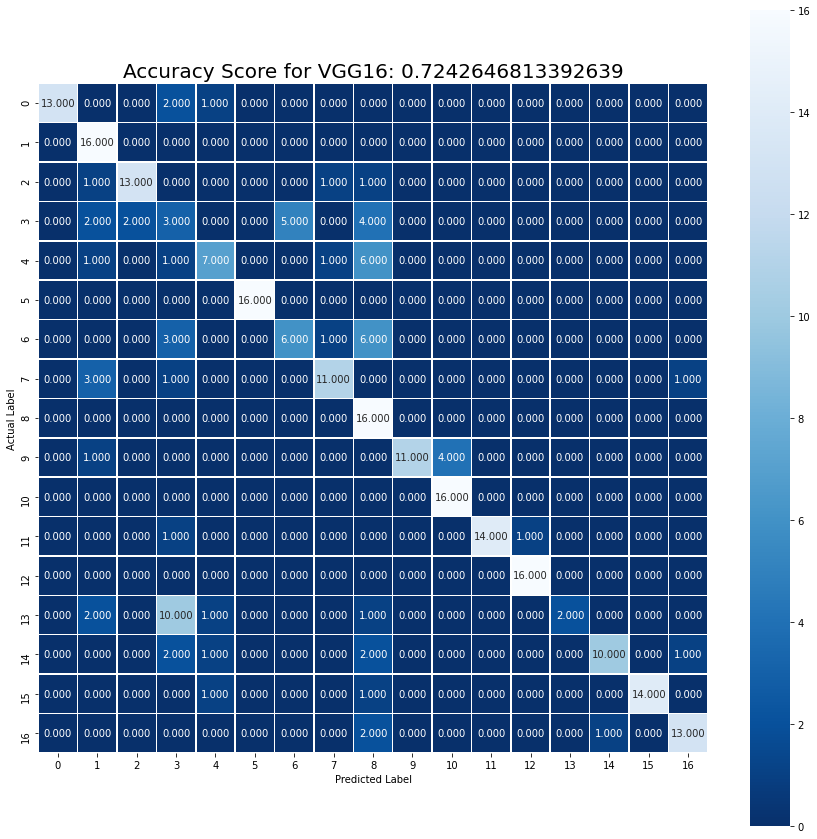

In [92]:
# Confusion Matrix

cm = confusion_matrix(y_test_cat,y_pred_vgg16)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for VGG16: {0}'.format(model.evaluate(X_test_new, y_test_new, verbose=0)[1])
plt.title(all_sample_title, size = 20)

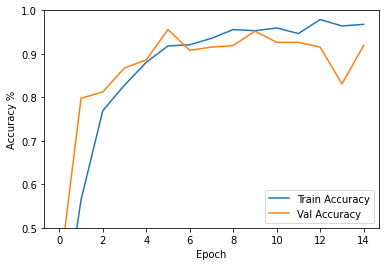

In [91]:
# plot the accuracy history
import matplotlib.pyplot as plt
def plot_history(history):
 plt.figure()
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy %')
 plt.plot(history.epoch, np.array(history.history['acc']),
 label='Train Accuracy')
 plt.plot(history.epoch, np.array(history.history['val_acc']),
 label = 'Val Accuracy')
 plt.legend()
 plt.ylim([0.5, 1])
plot_history(history)

In [88]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['CNN w/ Transfer Learning'],'Accuracy': model.evaluate(X_test_new, y_test_new, verbose=0)[1]},index={'4'})
resultsdf = pd.concat([resultsdf, tempResultsDf])

### Compare the results from the above step along with your detailed observations.

In [89]:
resultsdf

Model  Accuracy
1             MultinomialNB  0.334559
2                       ANN  0.658088
3                       CNN  0.683824
4  CNN w/ Transfer Learning  0.724265

## Inferences:-
### 1. MultinomialNB or the supervised algorithm gives the least score among other models here. As supervised learning models can't calculate the distances in 3D space or can't extract the features from images. That is why the data is to be flattened before feeding to model.

### 2. Since there is always a chance for overfitting in ANN and CNN, ImageDataGenerator was introduced earlier.

### 3. In ANN or Deep Neural Nets is better than supervised learning as its good at extracting features which helps in improving the accuracy. But the major drawback is that it has large number of weights as each layer gets added, which becomes computationally intensive and dense layer losses neighbourhood information is lost. Overfitting is observed even though accuracy is not that high.

### 4. CNN has better accuracy than ANN as it has special layer "Conv2D" which particularly helps in extracting feature from images, which then is flattened and given to a dense or Fully connected layer for output.Since dataset was small also the Dense layer losses neighbourhood information is lost, so the accuracy could'nt be improved much. Model is good but accuracy is on mid level.

### 5. This is where transfer learning comes into picture as this pretrained model has been trained on a very large dataset which helps in getting bettter accuracy. 

### 6. Here we have used VGG16 that has been trainedon imagenet dataset and we have unfrozen last 4 layers. We see overfitting but accuracy is high at the same time.

### 7. With proper hyperparameter tunning, the overfitting of CNN with transfer learning can be reduced and a good model with high accuracy can be built. Like using ImageDataGenerator, Dropout layers, selection of proper optimizers and kernel regularizers. 

# 5. Create a GUI to import the image “Prediction.jpg” and use the above designed AIML image classification model to predict the class/label of this image

In [90]:
import tensorflow as tf
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

#load the trained model to classify the images

# from tf.keras.models import load_model
model = tf.keras.models.load_model('oxflower17_VGG16.h5')

# Dictionary to label all the CIFAR-10 dataset classes.

classes = {0: 'Daffodil', 
           1: 'Snowdrop',
           2: 'LilyValley', 
           3: 'Bluebell', 
           4: 'Crocus', 
           5: 'Iris', 
           6: 'Tigerlily', 
           7: 'Tulip', 
           8: 'Fritillary', 
           9: 'Sunflower', 
           10: 'Daisy', 
           11: 'ColtisFoot', 
           12: 'Dandelion', 
           13: 'Cowslip', 
           14: 'Buttercup', 
           15: 'Windflower', 
           16: 'Pansy'
          }  

# Initialise GUI

top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification OXFLOWER17')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
label.place(relx = 0.5, anchor = 'center')

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((224,224))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict([image])[0]
    pred = np.argmax(pred)
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.05,rely=0.15)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)

upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
label_1= Label(top,justify=tk.LEFT,font=('arial',15,'bold'), padx = 10,text= "Classified as : ")
label_1.place(relx=0.20,rely=0.16)
# label_1.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification OXFLOWER17",pady=20, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack(side = TOP)
top.mainloop()

# PART 2

---

---





#  Explain in depth your strategy to maintain and support the AIML image classifier after it in production.

#### Strategy to maintain and support the AIML image classifier after it's in production.

##### 1. Save all the prediction made through the AIML image classifier.
##### 2. Carefully study and analyze the predictions made by classiffier.
##### 3. Remove the wrong classifications from saved predictions.
##### 4. Re-train the model after adding the saved predictions to train data on a regular interval.
##### 5. Deploy the new model and repeat the process from step 1.
##### 6. This will ensure that the model is refined on regular basis.